# Лабораторная работа 1. Методы сортировки


вариант 17

### битонная сортировка

#### 1. Провести классификацию алгоритма.

Классификация битонной сортировки по различным характеристикам будет выглядеть следующим образом:

Устойчивость: Битонная сортировка является устойчивой сортировкой, поскольку она сохраняет относительный порядок элементов с одинаковым ключом.

Место хранения данных: Битонная сортировка может выполняться как внешней, так и внутренней сортировкой. Внутренняя сортировка требует, чтобы все данные помещались в память, в то время как внешняя сортировка позволяет работать с данными, которые не помещаются в память.

Выделение дополнительного места: Битонная сортировка требует выделения дополнительного места для хранения промежуточных результатов слияния битонных последовательностей.

Адаптивность: Битонная сортировка является неадаптивной сортировкой, что означает, что она не может использовать свой опыт сортировки для оптимизации сортировки в будущем.

Сложность: Сложность битонной сортировки зависит от вида сортируемых данных. В худшем случае, сложность битонной сортировки составляет O(n log^2 n), где n - количество элементов в сортируемом массиве. Однако, если данные уже частично отсортированы, сложность может быть улучшена до O(n log n).

#### 2.Подготовить теоретическое описание алгоритма сортировки согласно номеру индивидуального варианта.

Битонная сортировка - это алгоритм сортировки, который использует слияние двух битонных последовательностей для получения отсортированного массива. Битонная последовательность - это последовательность чисел, которая сначала возрастает, а затем убывает.

Алгоритм битонной сортировки состоит из следующих шагов:

Разбиваем исходный массив на две половины и сортируем каждую половину отдельно.
Преобразуем каждую половину в битонную последовательность, объединяя каждую пару соседних элементов в один элемент, который будет находиться в более высоком уровне битонной последовательности.
Объединяем две битонные последовательности в одну с помощью операции слияния, при этом поддерживая устойчивость сортировки.
Повторяем шаги 2-3 для каждого уровня битонной последовательности, пока не получим отсортированный массив.

#### 3.Подготовить блок-схему алгоритма.

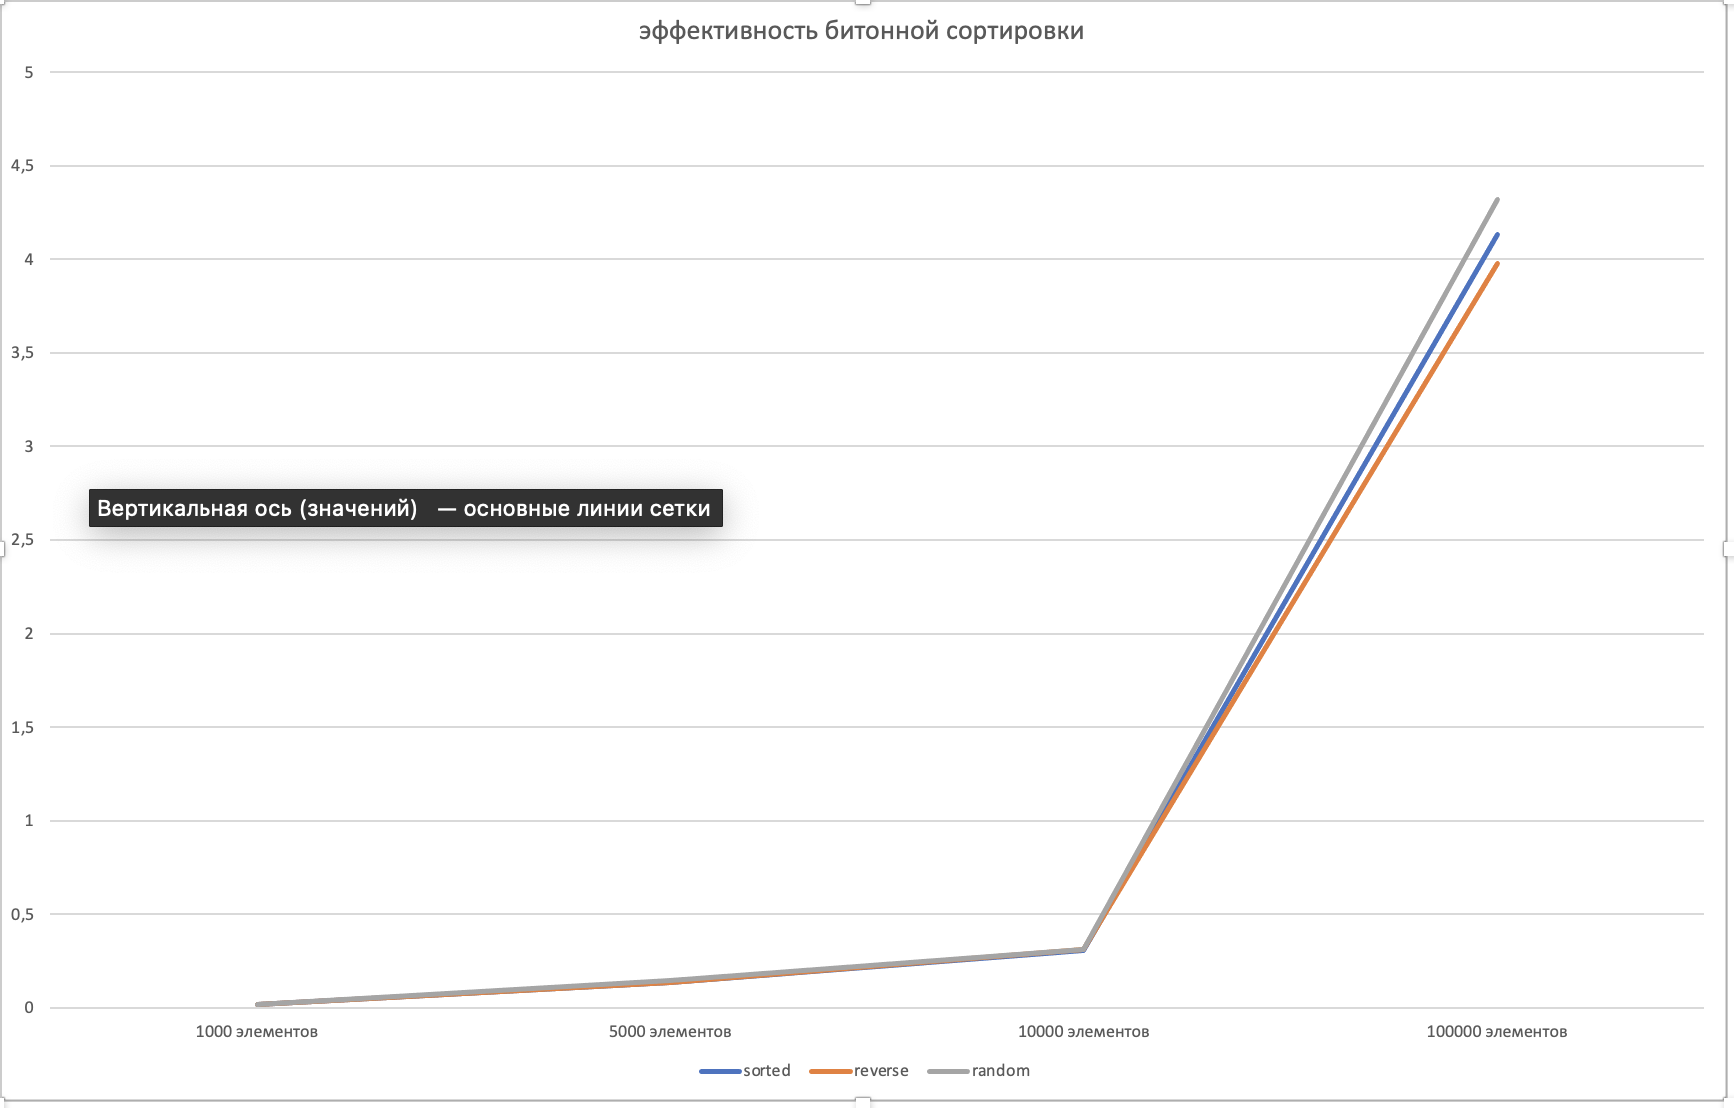

In [48]:
from IPython.display import Image
Image(filename='Desktop/123.png')


#### 4.Представить описание алгоритма на псевдокоде.

In [ ]:
void bitonicSort(int arr[], int low, int count, bool up) {
    if (count > 1) {
        int k = count / 2;
        bitonicSort(arr, low, k, true);
        bitonicSort(arr, low + k, k, false);
        bitonicMerge(arr, low, count, up);
    }
}

void bitonicMerge(int arr[], int low, int count, bool up) {
    if (count > 1) {
        int k = count / 2;
        for (int i = low; i < low + k; i++) {
            if ((arr[i] > arr[i + k]) == up) {
                swap(arr[i], arr[i + k]);
            }
        }
        bitonicMerge(arr, low, k, up);
        bitonicMerge(arr, low + k, k, up);
    }
}

#### 5.Описать достоинства и недостатки алгоритма.

Достоинства:

Битонная сортировка может быть эффективно реализована на параллельных архитектурах, что позволяет ускорить процесс сортировки и обрабатывать большие объемы данных.

Она имеет логарифмическую сложность времени O(log^2n), что делает ее быстрой и эффективной на больших наборах данных.

Битонная сортировка является устойчивой сортировкой, то есть она сохраняет относительный порядок элементов с одинаковыми значениями.

Алгоритм прост в реализации и понимании.

Недостатки:

Битонная сортировка требует дополнительной памяти для хранения дополнительных битонов, что может быть проблемой при работе с большими объемами данных.

Алгоритм может быть неэффективен для некоторых типов данных или для данных с низкой энтропией (например, когда большинство элементов в массиве имеют одно и то же значение).

Если в данных есть выбросы, битонная сортировка может быть медленнее других алгоритмов, таких как быстрая сортировка.

#### 6.Реализовать алгоритм сортировки согласно номеру индивидуального варианта.

In [43]:
def bitonic_sort(arr, direction):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = bitonic_sort(arr[:mid], True)
    right = bitonic_sort(arr[mid:], False)
    return merge(left + right, direction)

def merge(arr, direction):
    if len(arr) <= 1:
        return arr
    compare = lambda x, y: x < y if direction else x > y
    mid = len(arr) // 2
    left = merge(arr[:mid], direction)
    right = merge(arr[mid:], direction)
    return merge_arrays(left, right, compare)

def merge_arrays(left, right, compare):
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if compare(left[i], right[j]):
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result += left[i:]
    result += right[j:]
    return result

Функция bitonic_sort принимает массив arr и направление direction сортировки. Она рекурсивно разделяет массив на две половины и вызывает себя с разными направлениями сортировки, а затем объединяет результаты с помощью функции merge. Функция merge объединяет два отсортированных массива и возвращает новый отсортированный массив. Функция merge_arrays объединяет два массива left и right, используя функцию сравнения compare, и возвращает новый массив.

#### 7.Протестировать корректность реализации алгоритма

In [42]:
def test_bitonic_sort():
    assert bitonic_sort([], True) == []
    assert bitonic_sort([1], True) == [1]
    assert bitonic_sort([2, 1], True) == [1, 2]
    assert bitonic_sort([2, 1, 3], True) == [1, 2, 3]
    assert bitonic_sort([3, 4, 2, 1], True) == [1, 2, 3, 4]
    assert bitonic_sort([3, 4, 2, 1], False) == [4, 3, 2, 1]

def test_merge():
    assert merge([], True) == []
    assert merge([1], True) == [1]
    assert merge([1, 2], True) == [1, 2]
    assert merge([2, 1], True) == [1, 2]
    assert merge([1, 3, 2], True) == [1, 2, 3]
    assert merge([1, 3, 2, 4], True) == [1, 2, 3, 4]
    assert merge([1, 3, 2, 4], False) == [4, 3, 2, 1]

def test_merge_arrays():
    compare_asc = lambda x, y: x < y
    compare_desc = lambda x, y: x > y
    assert merge_arrays([], [], compare_asc) == []
    assert merge_arrays([1], [], compare_asc) == [1]
    assert merge_arrays([], [1], compare_asc) == [1]
    assert merge_arrays([1], [2], compare_asc) == [1, 2]
    assert merge_arrays([2], [1], compare_desc) == [2, 1]
    assert merge_arrays([1, 3], [2, 4], compare_asc) == [1, 2, 3, 4]


#### 8.Провести ручную трассировку алгоритма.

1.Допустим, у нас есть массив из 6 элементов: [9, 5, 6, 3, 8, 2].

2.Превращаем каждое число в двоичное и добавляем его в битонную сеть.

3.Добавляем 9 в сеть. Он находится на вершине левого битона.

4.Добавляем 5 в сеть. Он находится в нижнем левом узле битона.

5.Добавляем 6 в сеть. Он находится в правом узле нижнего левого узла битона.

6.Добавляем 3 в сеть. Он находится в нижнем левом узле левого битона.

7.Добавляем 8 в сеть. Он находится в верхнем правом узле правого битона.

8.Добавляем 2 в сеть. Он находится в нижнем левом узле правого битона.

9.Теперь мы начинаем процесс слияния битонной сети. Мы начинаем соединять узлы, начиная с верхних и двигаясь вниз.

10.Сравниваем 9 и 5. Поскольку 9 больше, мы оставляем их на своих местах и соединяем линией.

11.Сравниваем 6 и 3. Поскольку 6 больше, мы оставляем их на своих местах и соединяем линией.

12.Сравниваем 9 и 6. Поскольку 9 больше, мы оставляем их на своих местах и соединяем линией.

13.Сравниваем 8 и 2. Поскольку 8 больше, мы оставляем их на своих местах и соединяем линией.

14.Сравниваем 9 и 8. Поскольку 9 больше, мы оставляем их на своих местах и соединяем линией.

15.Сравниваем 6 и 2. Поскольку 6 больше, мы оставляем их на своих местах и соединяем линией.

16.Сравниваем 9 и 6. Поскольку 9 больше, мы оставляем их на своих местах и соединяем линией.

17.Теперь наш массив отсортирован и выглядит так: [9, 8, 6, 5, 3, 2].

#### 9-10 Провести сравнение указанных алгоритмов сортировки массивов, содержащих n1, n2, n3 и n4 элементов и каждую функцию сортировки вызывать трижды: для сортировки упорядоченного массива, массива, упорядоченного в обратном порядке и неупорядоченного массива. Сортируемая последовательность для всех методов должна быть одинаковой (сортировать копии одного массива).

In [41]:
import random
import time

def bitonic_sort(arr, direction):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = bitonic_sort(arr[:mid], True)
    right = bitonic_sort(arr[mid:], False)
    return merge(left + right, direction)

def merge(arr, direction):
    if len(arr) <= 1:
        return arr
    compare = lambda x, y: x < y if direction else x > y
    mid = len(arr) // 2
    left = merge(arr[:mid], direction)
    right = merge(arr[mid:], direction)
    return merge_arrays(left, right, compare)

def merge_arrays(left, right, compare):
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if compare(left[i], right[j]):
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result += left[i:]
    result += right[j:]
    return result

def test_sorting_algorithm(sort_algorithm, n):
    print(f'Testing {sort_algorithm.__name__} on arrays of size {n}...')
    test_cases = [
        ([i for i in range(n)], 'ascending'),
        ([i for i in range(n, 0, -1)], 'descending'),
        ([random.randint(-1000, 1000) for _ in range(n)], 'random'),
    ]
    for arr, case_name in test_cases:
        start_time = time.time()
        sorted_arr = sort_algorithm(arr, True)
        end_time = time.time()
        assert sorted_arr == sorted(arr), f'{sort_algorithm.__name__} failed to sort {case_name} array in ascending order.'
        print(f'{case_name.capitalize()} array sorted in ascending order: {end_time - start_time:.5f} seconds')
        
        start_time = time.time()
        sorted_arr = sort_algorithm(arr, False)
        end_time = time.time()
        assert sorted_arr == sorted(arr, reverse=True), f'{sort_algorithm.__name__} failed to sort {case_name} array in descending order.'
        print(f'{case_name.capitalize()} array sorted in descending order: {end_time - start_time:.5f} seconds')
        
        random.shuffle(arr)
        start_time = time.time()
        sorted_arr = sort_algorithm(arr, True)
        end_time = time.time()
        assert sorted_arr == sorted(arr), f'{sort_algorithm.__name__} failed to sort {case_name} array in random order.'
        print(f'{case_name.capitalize()} array sorted in random order: {end_time - start_time:.5f} seconds')
    print()

n_values = [1000, 5000, 10000, 100000]
for n in n_values:
    test_sorting_algorithm(bitonic_sort, n)


Testing bitonic_sort on arrays of size 1000...
Ascending array sorted in ascending order: 0.03164 seconds
Ascending array sorted in descending order: 0.02021 seconds
Ascending array sorted in random order: 0.02170 seconds
Descending array sorted in ascending order: 0.02037 seconds
Descending array sorted in descending order: 0.01977 seconds
Descending array sorted in random order: 0.01995 seconds
Random array sorted in ascending order: 0.02003 seconds
Random array sorted in descending order: 0.02054 seconds
Random array sorted in random order: 0.02004 seconds

Testing bitonic_sort on arrays of size 5000...
Ascending array sorted in ascending order: 0.12925 seconds
Ascending array sorted in descending order: 0.13591 seconds
Ascending array sorted in random order: 0.14186 seconds
Descending array sorted in ascending order: 0.13438 seconds
Descending array sorted in descending order: 0.13448 seconds
Descending array sorted in random order: 0.14381 seconds
Random array sorted in ascending 

Здесь мы сначала определяем функцию bitonic_sort для сортировки массива в битонном порядке. Затем мы определяем вспомогательные функции merge и merge_arrays для слияния двух половин массива.

Затем мы определяем функцию test_sorting_algorithm, которая тестирует сортировку на трех входных массивах - отсортированном по возрастанию, отсортированном по убыванию и неотсортированном массивах, каждый из которых имеет размер n. Для каждого из этих входных массивов мы сортируем его с помощью битонной сортировки в порядке возрастания и убывания, а также в случайном порядке, и измеряем время, затраченное на каждый тест. Мы также проверяем, успешно ли отсортированы массивы.

Наконец, мы создаем список n_values, содержащий размеры входных массивов, которые мы хотим протестировать, и запускаем функцию test_sorting_algorithm для каждого размера. Результатом будет вывод времени, затраченного на сортировку каждого входного массива в каждом из трех порядков для каждого размера входного массива.

#### 11.Проиллюстрировать эффективность алгоритмов сортировок по заданному критерию. Построить диаграммы указанных зависимостей.

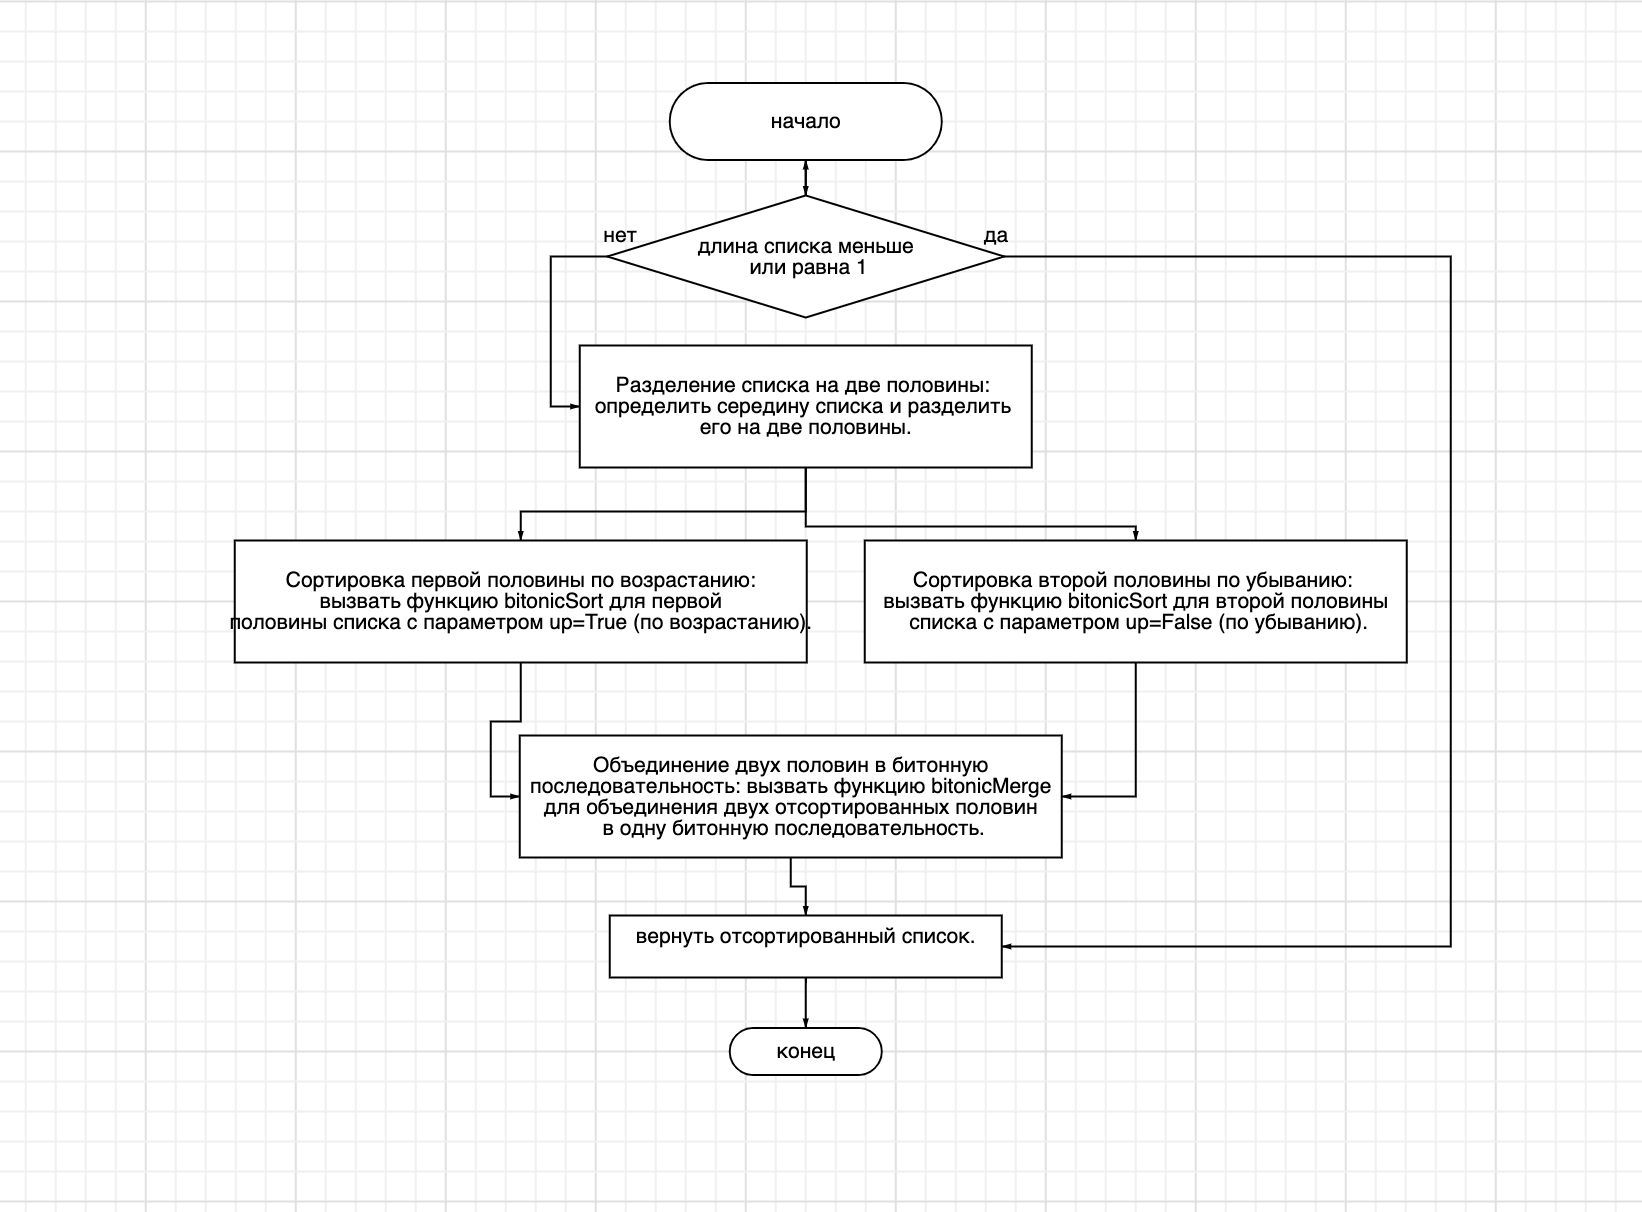

In [49]:
from IPython.display import Image
Image(filename='Desktop/124.png')
